In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift,estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score


Sobre o conjunto de dados

Contexto

A HELP International é uma ONG humanitária internacional que está empenhada em combater a pobreza e em fornecer às pessoas dos países atrasados ​​comodidades básicas e ajuda em tempos de catástrofes e calamidades naturais. A HELP International conseguiu arrecadar cerca de US$ 10 milhões. Este dinheiro precisa agora de ser atribuído de forma estratégica e eficaz. Assim, para decidir a selecção dos países que mais necessitam de ajuda, devem ser tomadas decisões baseadas em dados. Assim, torna-se necessário categorizar os países utilizando factores socioeconómicos e de saúde que determinam o desenvolvimento global do país. Assim, com base nestes agrupamentos de países, dependendo das suas condições, serão atribuídos fundos para assistência durante períodos de catástrofes e calamidades naturais. É um caso claro de aprendizagem não supervisionada, em que temos de criar agrupamentos de países com base nas diferentes características presentes.

Atributos do conjunto de dados¶

* país: Nome do país
* child_mort: Morte de crianças menores de 5 anos por 1000 nascidos vivos
* * exportações: Exportações de bens e serviços per capita. Dado como %idade do PIB per capita
saúde: Gasto total com saúde per capita. Dado como %idade do PIB per capita
* importações: Importações de bens e serviços per capita. Dado como %idade do PIB per capita
* Renda: Renda líquida por pessoa
* Inflação: A medição da taxa de crescimento anual do PIB total
* life_expec : O número médio de anos que uma criança recém-nascida viveria se os atuais padrões de mortalidade fossem re...
* total_fer: O número de filhos que nasceriam de cada mulher se as atuais taxas de fertilidade por idade permanecessem as...
* PIB: O PIB per capita. Calculado como o PIB total dividido pela população total.

In [2]:

# Carregar os dados
data = pd.read_csv('Country-data.csv')

# Exibir as primeiras linhas do dataframe
data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


 # Análise Exploratória de Dados (EDA)

In [5]:
# Verificar valores nulos
print(data.isnull().sum())


country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [6]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


C:\Users\RenanGarciaRosa\AppData\Local\Temp\ipykernel_12064\1918722842.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[numerical_features[i]],color = colors[0])
C:\Users\RenanGarciaRosa\AppData\Local\Temp\ipykernel_12064\1918722842.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat

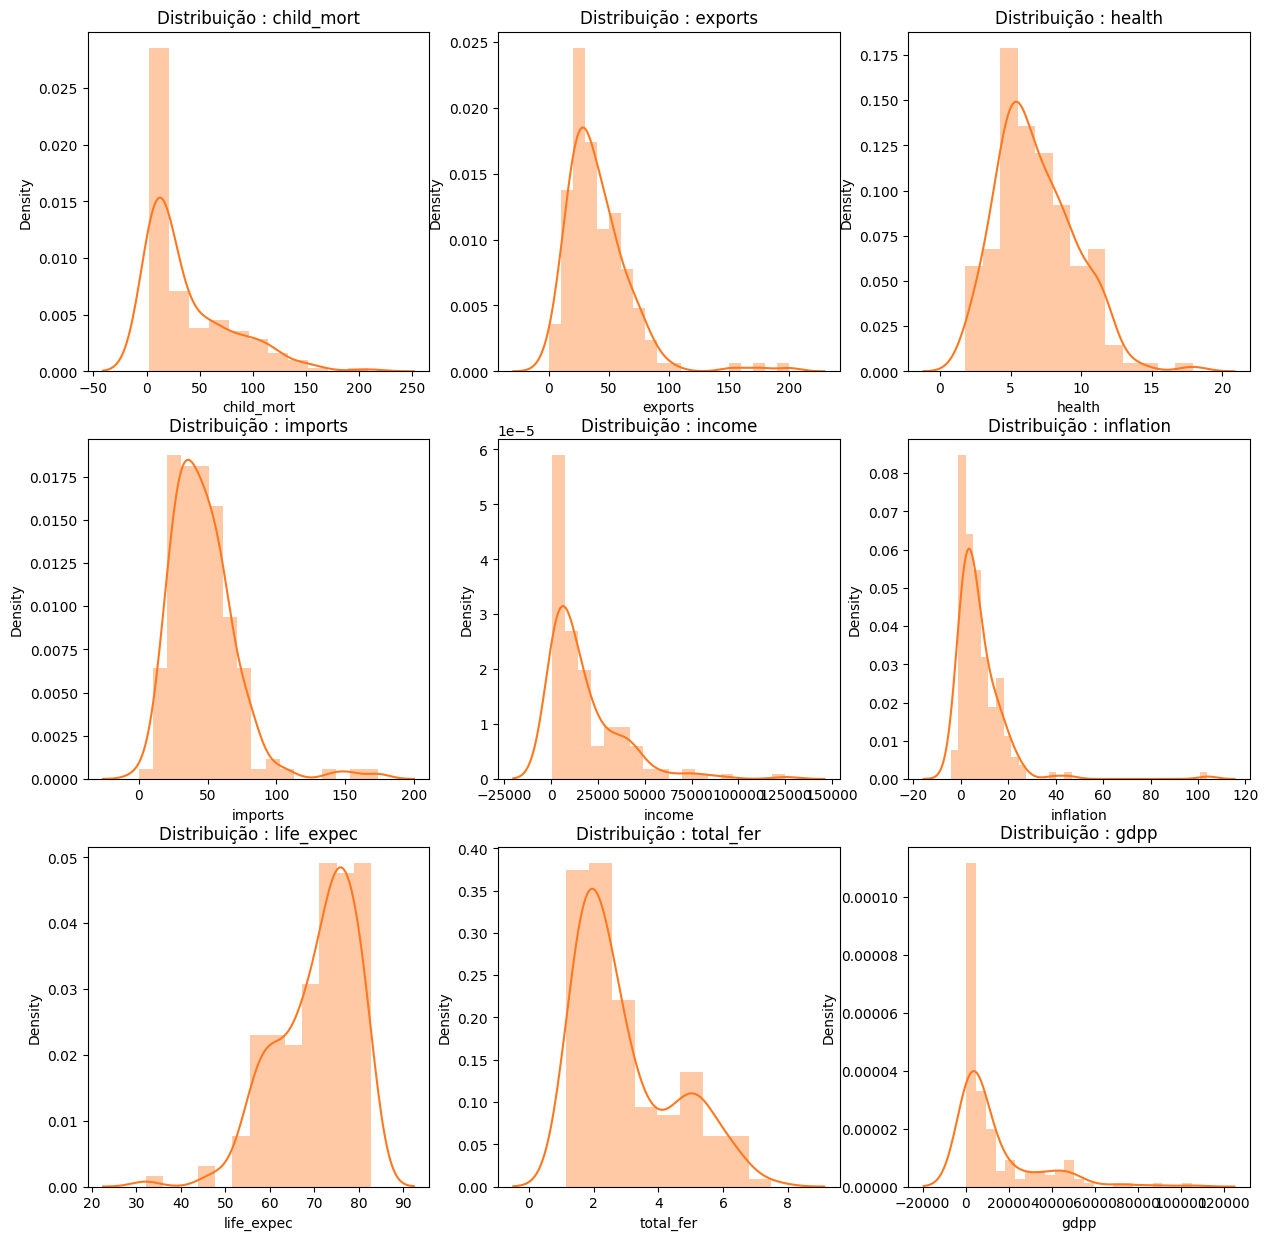

In [7]:
# Plotar a distribuição de cada variável
colors = ['#FF781F','#2D2926']
fig, ax = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribuição : ' + numerical_features[i]
    plt.title(title)
plt.show()

* life_expec exibe uma distribuição de dados inclinada para a esquerda ou negativamente.
* health exibe dados normalmente distribuídos.
* Todos os recursos restantes mostram uma distribuição de dados correta ou positivamente distorcida.
* A distribuição de dados do país não é divulgada porque contém dados de texto e possui o mesmo número de valores exclusivos que o comprimento do dataframe

Características dos países economicamente atrasados:¶

* A renda per capita do país é muito baixa.
* População elevada que leva à indisponibilidade de recursos.
* Desemprego devido a menos recursos.
* Baixa riqueza do país que leva a baixo capital.
* Distribuição desigual de riqueza e renda.
* A falta de instalações educacionais adequadas e, portanto, prevalece o analfabetismo.
* Baixo nível de vida.
* Nenhum avanço técnico.
* Serviços de saúde deficientes, juntamente com altas taxas de natalidade e mortalidade.

A HELP Foundation precisa atingir os países que apresentam as características acima. Vamos agora visualizar os dados e encontrar os países que estão nos extremos e no centro de cada recurso para apontar os países que necessitam de assistência!

* child_mort: Nações economicamente atrasadas têm uma alta taxa de mortalidade infantil!

C:\Users\RenanGarciaRosa\AppData\Local\Temp\ipykernel_12064\1630565959.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
C:\Users\RenanGarciaRosa\AppData\Local\Temp\ipykernel_12064\1630565959.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
C:\Users\RenanGarciaRosa\AppData\Local\Temp\ipykernel_12064\1630565959.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

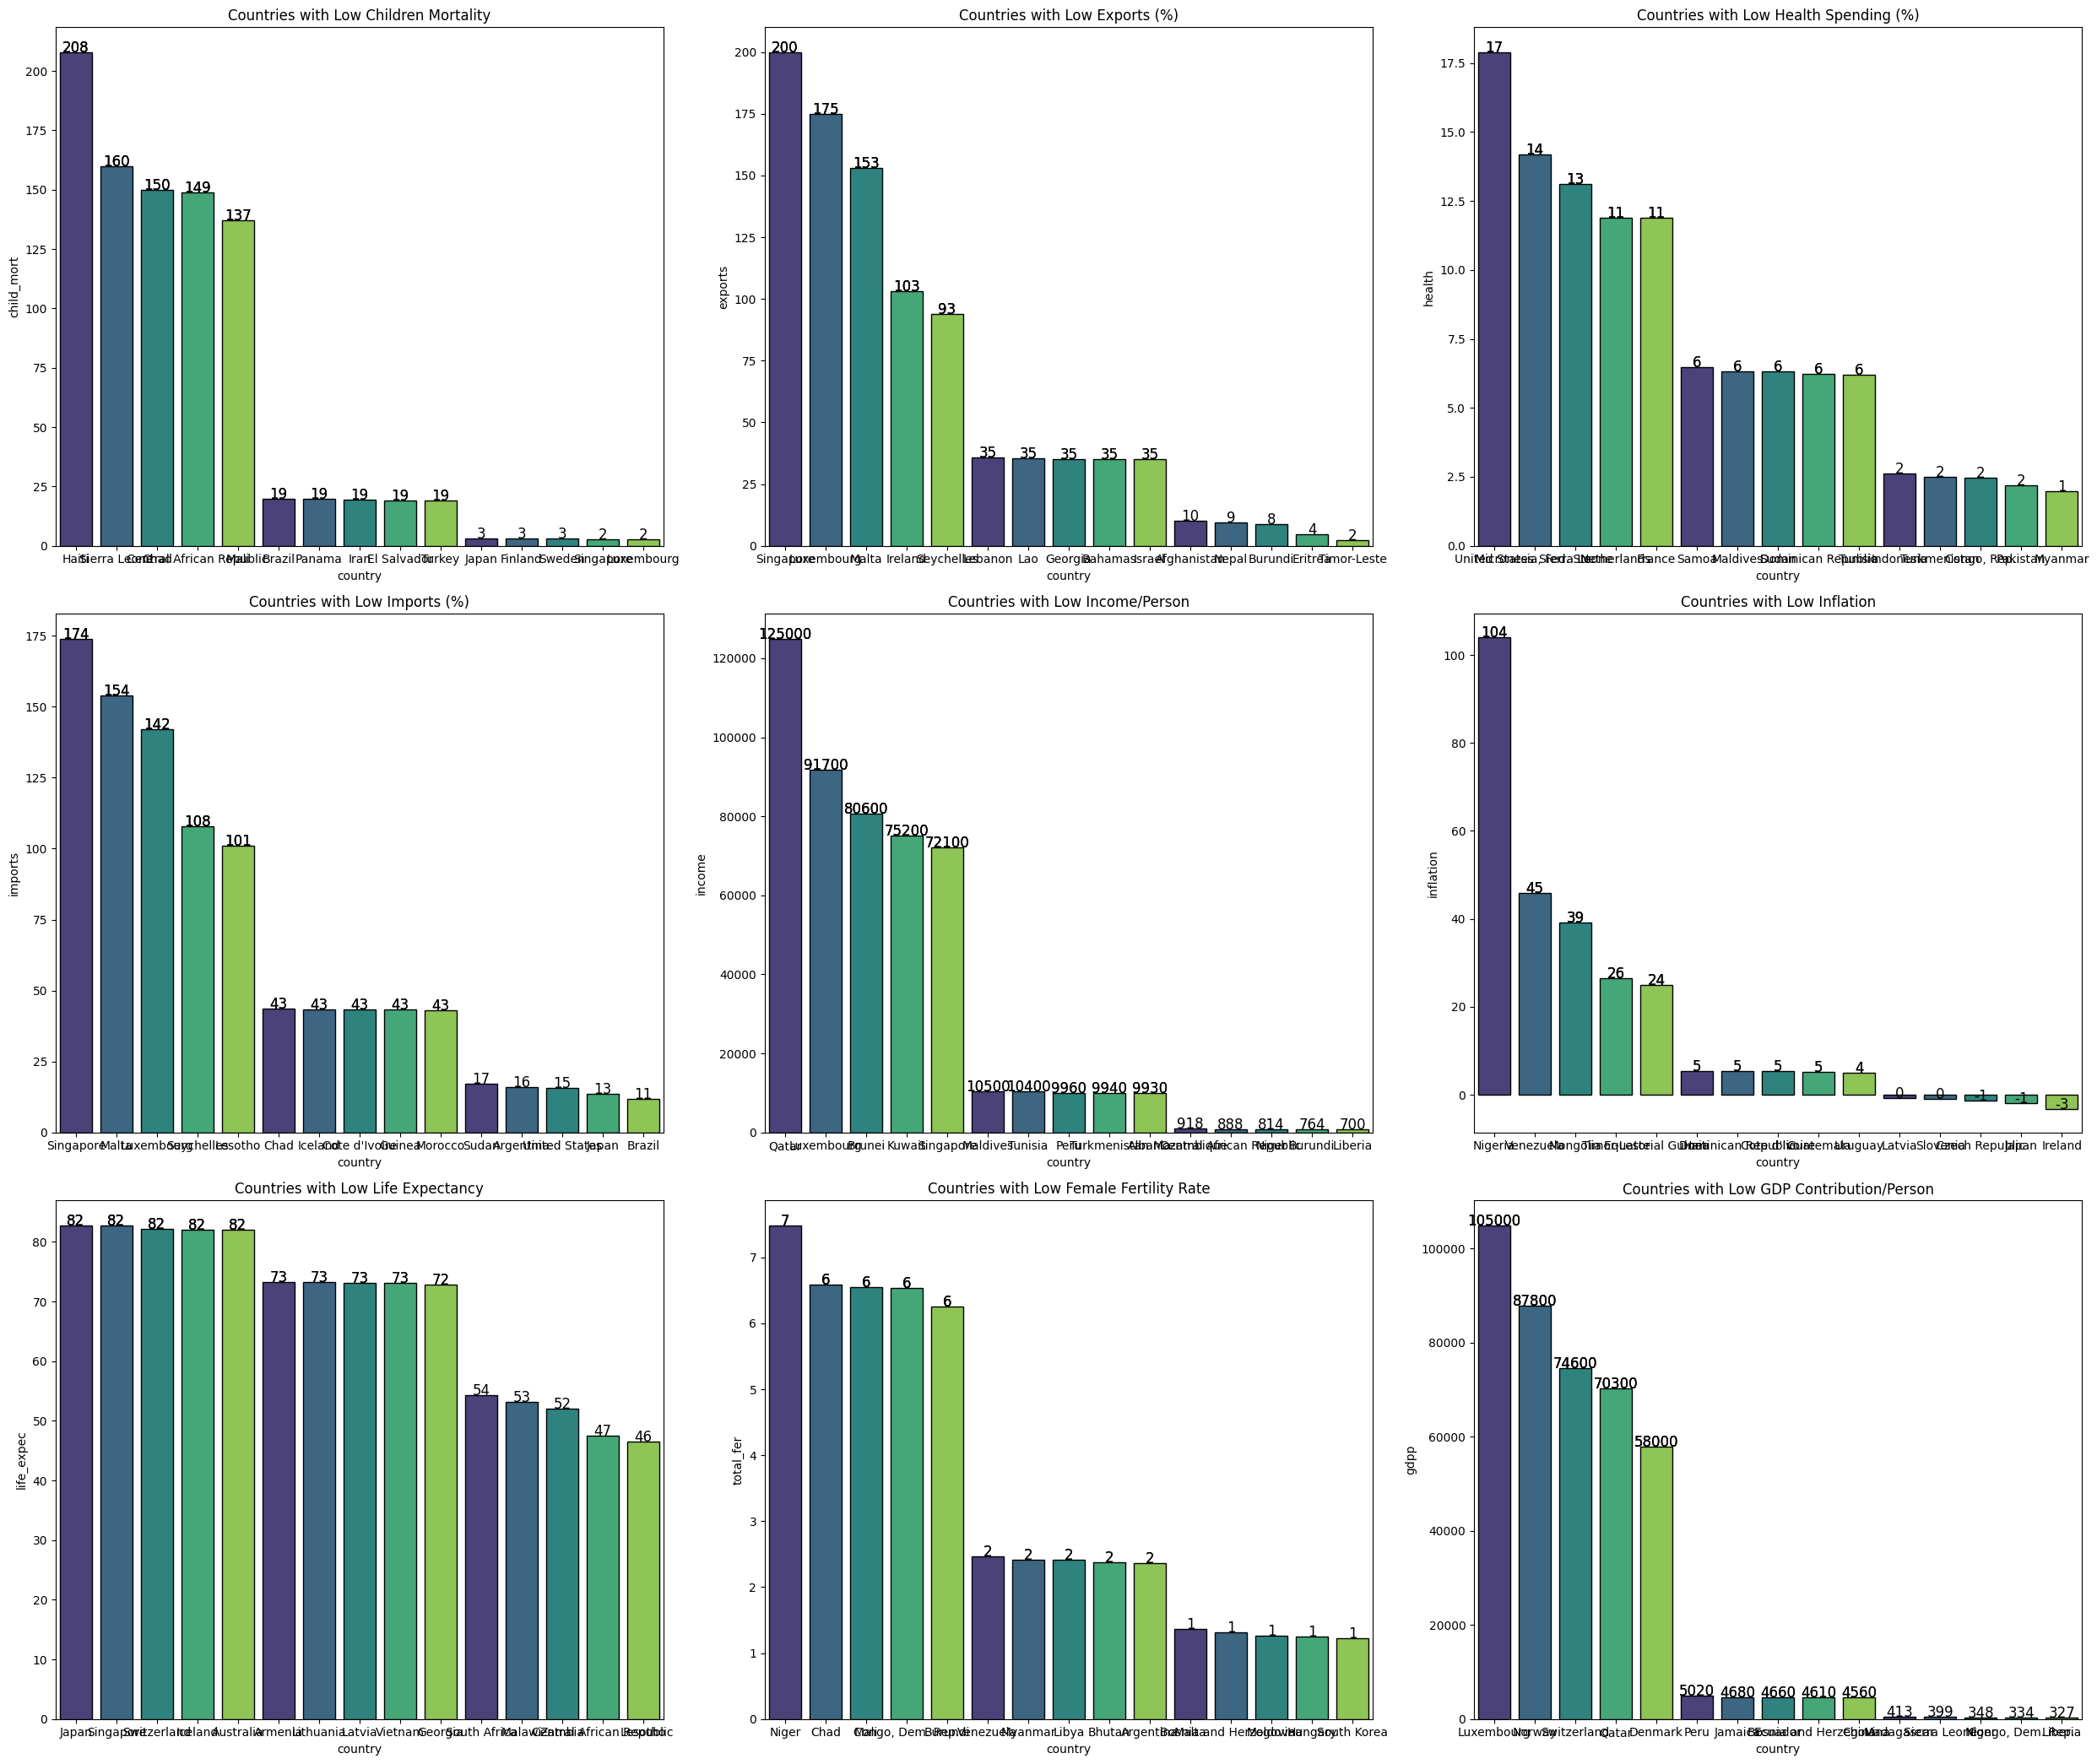

In [8]:
# Definir as cores a serem usadas nos plots
colors = sns.color_palette("viridis", 5)

# Lista de métricas e seus títulos correspondentes
metrics = [
    ('child_mort', 'Children Mortality'),
    ('exports', 'Exports (%)'),
    ('health', 'Health Spending (%)'),
    ('imports', 'Imports (%)'),
    ('income', 'Income/Person'),
    ('inflation', 'Inflation'),
    ('life_expec', 'Life Expectancy'),
    ('total_fer', 'Female Fertility Rate'),
    ('gdpp', 'GDP Contribution/Person')
]

# Função para adicionar rótulos nas barras
def add_labels(ax):
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()),
                horizontalalignment='center', fontsize=12)

# Plotar todas as métricas em uma grade 3x3
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 21))
axes = axes.flatten()

for i, (metric, title) in enumerate(metrics):
    ax = axes[i]

    # Plotar países com alta, média e baixa métrica
    for j, (title_suffix, idx_range) in enumerate([
        ('High', slice(0, 5)),
        ('Medial', slice(81, 86)),
        ('Low', slice(161, 166))
    ]):
        ax = plt.subplot(3, 3, i+1)
        sns.barplot(x='country', y=metric, data=data.sort_values(by=metric, ascending=False).iloc[idx_range], palette=colors, edgecolor='black', ax=ax)
        plt.title(f'Countries with {title_suffix} {title}')
        add_labels(ax)

# Ajustar layout
plt.tight_layout()
plt.show()

# Features Numericas

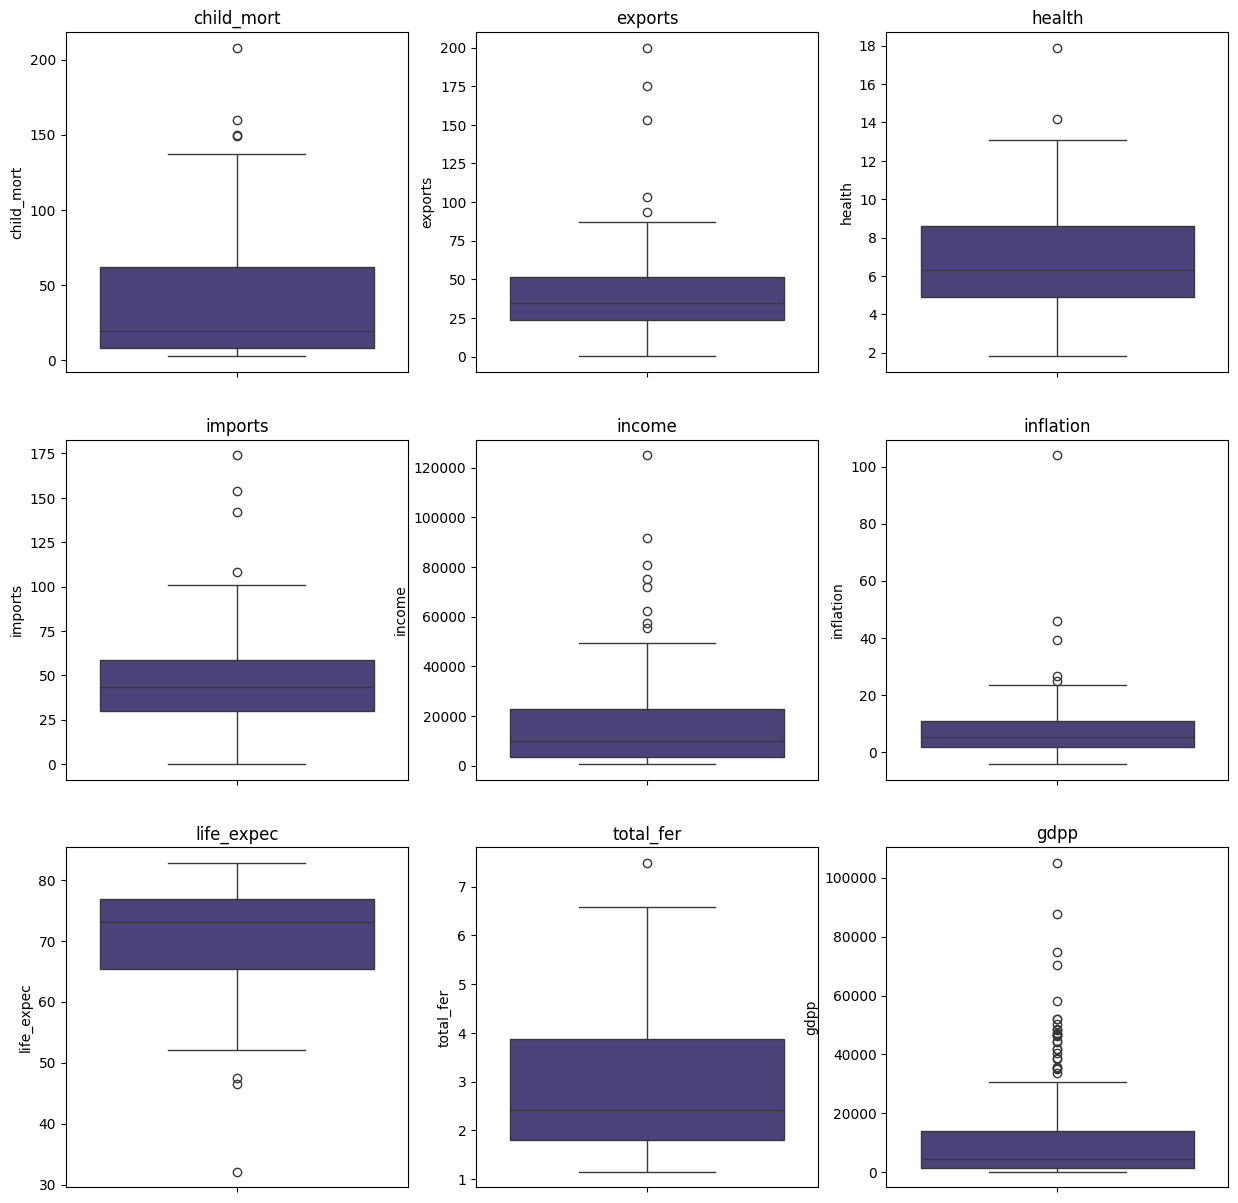

In [9]:
fig  = plt.subplots(nrows = 3,ncols = 3,figsize = (15,15))
for i in range(len(numerical_features)):
    plt.subplot(3,3,i+1)
    ax = sns.boxplot(data[numerical_features[i]],color = colors[0])
    plt.title(numerical_features[i])
plt.show()

# Resumo da EDA

* A partir das visualizações e da lista de características de nações economicamente atrasadas, uma série de insights podem ser obtidos!
* Quando se trata de condições de saúde, os países africanos ocupam posições mais elevadas em todas as situações erradas. Eles têm uma presença significativa em alta mortalidade infantil, baixa expectativa de vida e alta total_fer.
* Todos estes problemas já são bastante graves e por isso é muito importante ajudá-los durante os períodos de turbulências imprevistas. * Apesar desses números, o Haiti ocupa o primeiro lugar com altos valores de child_mort. Os países asiáticos e europeus estão presentes no outro extremo.
* Os cidadãos dos EUA são os que mais gastam com a sua saúde, mas não estão presentes nas 5 primeiras classificações de life_expec e total_fer. Nenhum dos países com elevada expectativa de vida está presente no top 5 da saúde. Os países asiáticos lotam o segmento inferior da saúde.
* Singapura, Malta, Luxemburgo e Seicheles estão presentes no top 5 das exportações e também das importações. O tamanho da população e a localização geográfica desempenham um papel fundamental quando se trata de importações e exportações.
* O Sudão é o único país africano com baixas importações e o Brasil tem as importações mais baixas de todas.
* Os países africanos apresentam valores de inflação muito elevados, enquanto países de todos os continentes podem ser encontrados com valores de inflação baixos.
* Os cidadãos do Qatar são os mais bem pagos, com Singapura e Luxemburgo novamente ocupando lugares entre os 5 primeiros com renda.
* Para o PIB, o Luxemburgo está no topo. Suíça e Catar estão presentes no top 5 em termos de renda semelhante.
* As nações africanas estão presentes no segmento inferior do rendimento e também do PIB. A colonização teve um enorme impacto nas nações africanas.

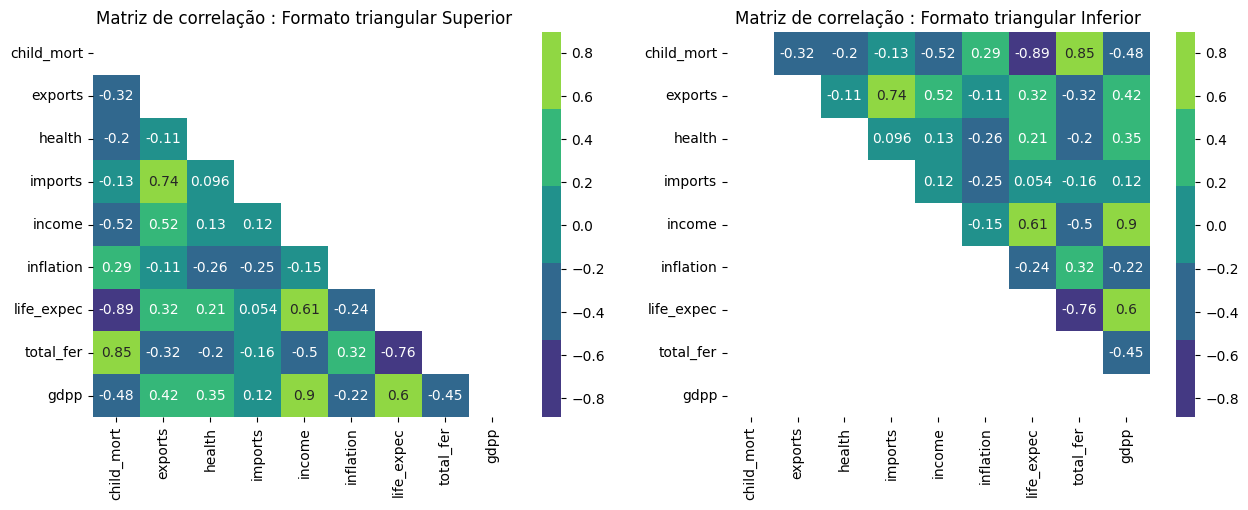

In [10]:
ut = np.triu(data[numerical_features].corr())
lt = np.tril(data[numerical_features].corr())

fig,ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(data[numerical_features].corr(),cmap = colors,annot = True,cbar = 'True',mask = ut);
plt.title('Matriz de correlação : Formato triangular Superior');

plt.subplot(1,2,2)
sns.heatmap(data[numerical_features].corr(),cmap = colors,annot = True,cbar = 'True',mask = lt);
plt.title('Matriz de correlação : Formato triangular Inferior');

* Muitos recursos têm relacionamentos entre si.
* child_mort aumenta claramente quando a renda, o PIB e as exportações diminuem. O aumento da inflação também leva a um elevado número de casos de morte infantil. Infelizmente, as condições económicas actuam como um factor importante!
* O aumento das exportações aumenta claramente o PIB, o rendimento e as importações.
* Os gastos com saúde têm um pequeno aumento na expectativa de vida e também diminuem a morte_infantil.
* renda e PIB apresentam um valor de correlação muito alto de 0,9. Do ponto de vista da saúde, os rendimentos elevados levaram a uma expectativa de vida mais elevada, mas diminuíram a fer_total numa margem significativa.
* Como esperado, a inflação elevada tem um efeito negativo nas características financeiras. A inflação alta exibe total_fer e child_mort altos. Isto descreve as características típicas de uma nação atrasada.
* De acordo com os dados, um life_expec mais alto exibe um total_fer baixo. Um PIB mais elevado levou a mais gastos com saúde.
* Podemos ver claramente que algumas características são essencialmente da mesma categoria e têm a mesma reação a outras características de categorias diferentes.

As 3 categorias de recursos são:
* saúde: criança_mort, saúde, expectativa de vida, total_fer
* comércio: importações, exportações
* finanças: renda, inflação, PIB

Conseqüentemente, iremos dissolver esses recursos nessas categorias e normalizá-los!

In [11]:
df1 = pd.DataFrame()
df1['Health'] = (data['child_mort'] / data['child_mort'].mean()) + (data['health'] / data['health'].mean()) + (data['life_expec'] / data['life_expec'].mean()) + (data['total_fer'] / data['total_fer'].mean())
df1['Trade'] = (data['imports'] / data['imports'].mean()) + (data['exports'] / data['exports'].mean())
df1['Finance'] = (data['income'] / data['income'].mean()) + (data['inflation'] / data['inflation'].mean()) + (data['gdpp'] / data['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


# Pré-processamento dos Dados

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc = 0, value = list(data['country']), column = 'Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


O modelo de algoritmo de clusterização não entende as unidades dos valores dos atributos. Ele trata a entrada apenas como um simples número, mas não entende o verdadeiro significado desse valor. Assim, torna-se necessário dimensionar os dados.
Ex: Idade = Anos; BS em jejum = mg/dl; Encargos = Moeda

Temos 2 opções para escalonamento de dados: 1) Normalização 2) Padronização. Como a maioria dos algoritmos assume que os dados são normalmente distribuídos (Gaussianos), a normalização é feita para recursos cujos dados não apresentam distribuição normal e a padronização é realizada para recursos que são normalmente distribuídos onde seus valores são enormes ou muito pequenos em comparação com outras características.
Normalização: os recursos de Saúde, Comércio e Finanças são normalizados!
Padronização: Nenhum dos recursos é padronizado para os dados acima.

In [13]:
data_scaled = df1.drop(columns = ['Country']).values # Combinasção das features : Health - Trade - Finance

In [14]:
# Função para calcular SSE
def calculate_sse(data, labels):
    sse = 0
    for label in set(labels):
        cluster_points = data[labels == label]
        centroid = cluster_points.mean(axis=0)
        sse += ((cluster_points - centroid) ** 2).sum()
    return sse

 # Implementação dos Algoritmos de Clusterização
## K-Means

Silhouette Score para K-Means: 0.45197076714375445
Davies-Bouldin Score para K-Means: 0.8882803136476843
SSE para K-Means: 6.451107371476114


c:\Users\RenanGarciaRosa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


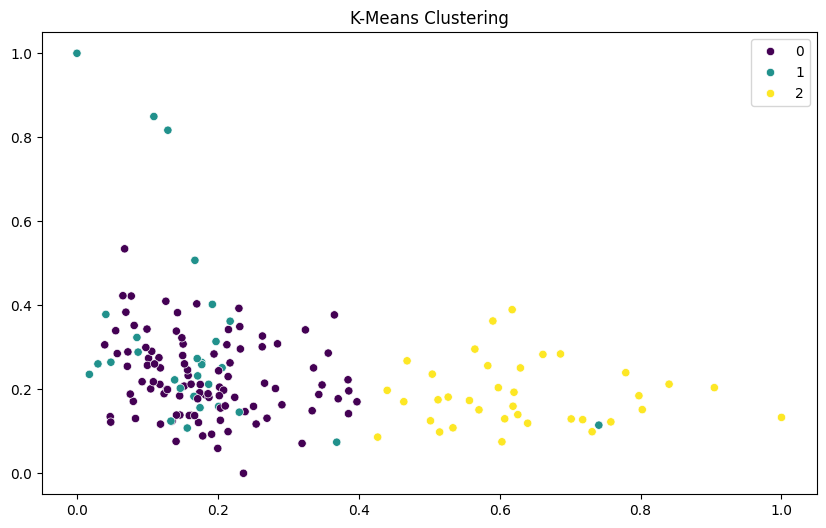

In [18]:
# Aplicar o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, kmeans_labels)
sse_kmeans = calculate_sse(data_scaled, kmeans_labels)
#rand_index_kmeans = adjusted_rand_score(data_scaled, kmeans_labels) - nao temos rotulos verdadeiros

print(f'Silhouette Score para K-Means: {silhouette_kmeans}')
print(f'Davies-Bouldin Score para K-Means: {davies_bouldin_kmeans}')
print(f'SSE para K-Means: {sse_kmeans}')
#print(f'Rand Index para K-Means: {rand_index_kmeans}')


# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering')
plt.show()


Agora temos os clusters, mas não sabemos qual valor corresponde a quê!
Portanto, desenhamos um boxplot de clusters rotulados de renda e child_mort w.r.t!
Sabemos que o baixo rendimento e a elevada mortalidade infantil são sinais de uma nação economicamente atrasada.

In [19]:
# Criar uma cópia do dataframe original e adicionar os rótulos das classes
data_kmeans = data.copy()
data_kmeans['KMeans_Class'] = kmeans_labels

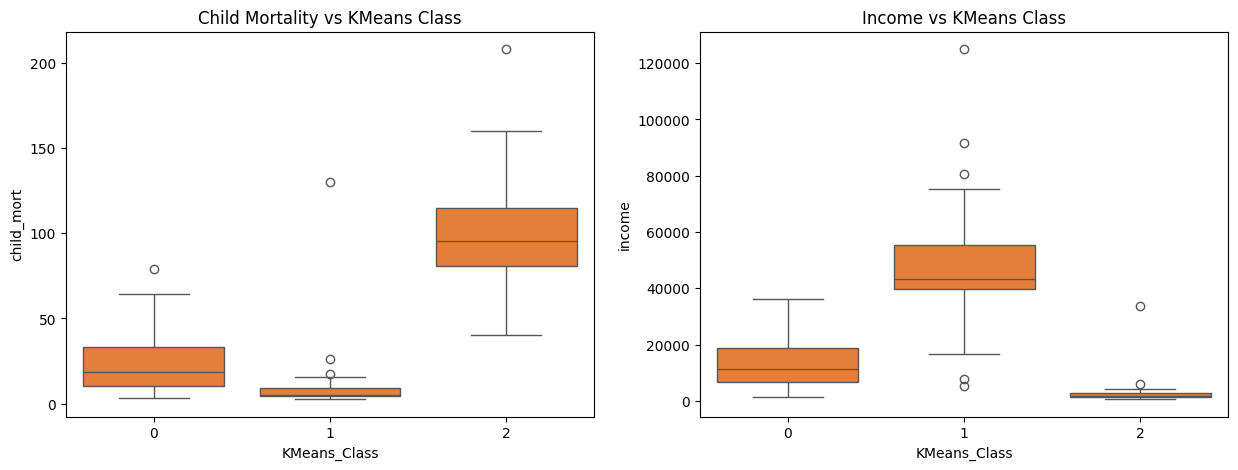

In [20]:
# Gráficos de boxplot para K-Means
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='KMeans_Class', y='child_mort', data=data_kmeans, color='#FF781F')
plt.title('Child Mortality vs KMeans Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='KMeans_Class', y='income', data=data_kmeans, color='#FF781F')
plt.title('Income vs KMeans Class')

plt.show()

## Aglomerative Clustering

Silhouette Score para Aglomerative Clustering: 0.37795779229139226
Davies-Bouldin Score para Aglomerative Clustering: 0.9749717444759479
SSE para Aglomerative Clustering: 6.949063830424908


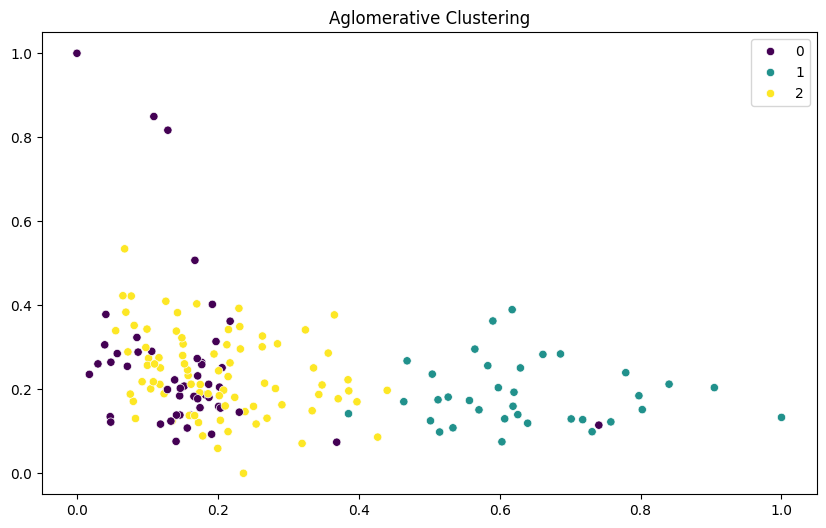

In [21]:
# Aplicar o Aglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_agg = silhouette_score(data_scaled, agg_labels)
davies_bouldin_agg = davies_bouldin_score(data_scaled, agg_labels)
sse_agg = calculate_sse(data_scaled, agg_labels)
#rand_index_agg = adjusted_rand_score(data_scaled, agg_labels)

print(f'Silhouette Score para Aglomerative Clustering: {silhouette_agg}')
print(f'Davies-Bouldin Score para Aglomerative Clustering: {davies_bouldin_agg}')
print(f'SSE para Aglomerative Clustering: {sse_agg}')
#print(f'Rand Index para Aglomerative Clustering: {rand_index_agg}')

# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=agg_labels, palette='viridis')
plt.title('Aglomerative Clustering')
plt.show()


In [22]:
# Criar uma cópia do dataframe original e adicionar os rótulos das classes
data_agg = data.copy()
data_agg['Agg_Class'] = agg_labels

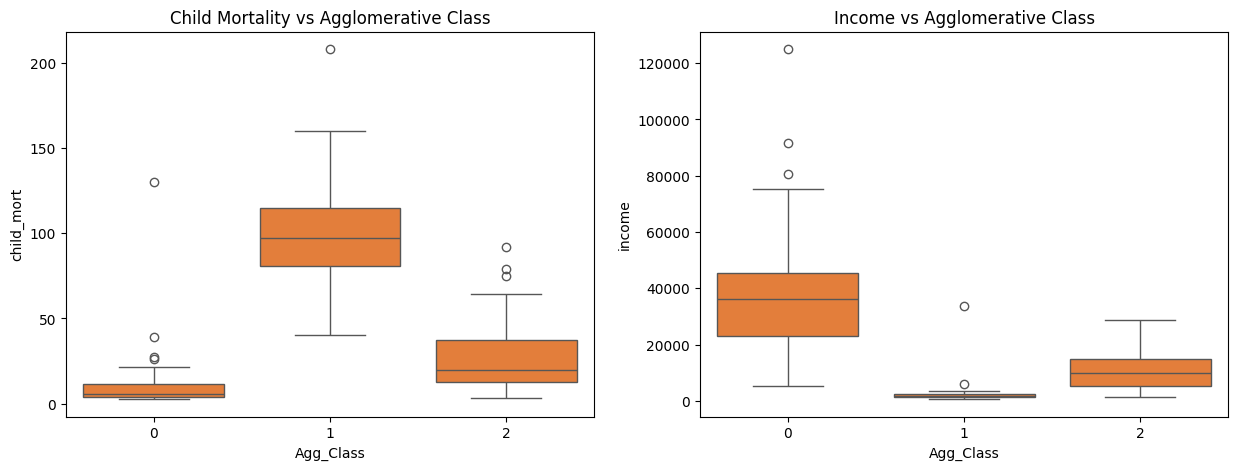

In [23]:
# Gráficos de boxplot para Aglomerative Clustering
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Agg_Class', y='child_mort', data=data_agg, color='#FF781F')
plt.title('Child Mortality vs Agglomerative Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='Agg_Class', y='income', data=data_agg, color='#FF781F')
plt.title('Income vs Agglomerative Class')

plt.show()

## MeanShift

Silhouette Score para MeanShift: 0.5408223366558955
Davies-Bouldin Score para MeanShift: 0.9583066883799424
SSE para MeanShift: 13.058158900234073


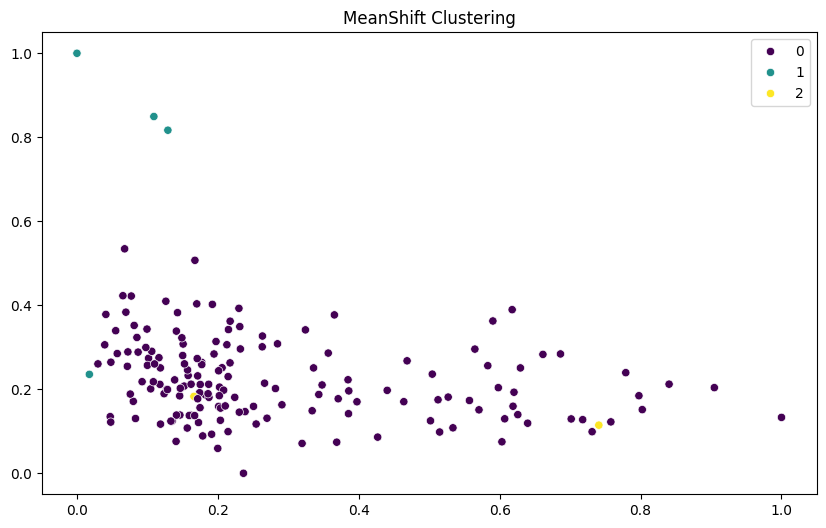

In [25]:
bandwidth = estimate_bandwidth(data_scaled, quantile=0.8)
mean_shift = MeanShift(bandwidth=bandwidth)
mean_shift_labels = mean_shift.fit_predict(data_scaled)

# Avaliação usando a medida de Silhouette
silhouette_mean_shift = silhouette_score(data_scaled, mean_shift_labels)
davies_bouldin_mean_shift = davies_bouldin_score(data_scaled, mean_shift_labels)
sse_mean_shift = calculate_sse(data_scaled, mean_shift_labels)
#rand_index_mean_shift = adjusted_rand_score(data_scaled, mean_shift_labels)

print(f'Silhouette Score para MeanShift: {silhouette_mean_shift}')
print(f'Davies-Bouldin Score para MeanShift: {davies_bouldin_mean_shift}')
print(f'SSE para MeanShift: {sse_mean_shift}')
#print(f'Rand Index para MeanShift: {rand_index_mean_shift}')
# Visualização dos resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=mean_shift_labels, palette='viridis')
plt.title('MeanShift Clustering')
plt.show()


In [26]:
# Criar uma cópia do dataframe original e adicionar os rótulos das classes
data_meanshift = data.copy()
data_meanshift['MeanShift_Class'] = mean_shift_labels

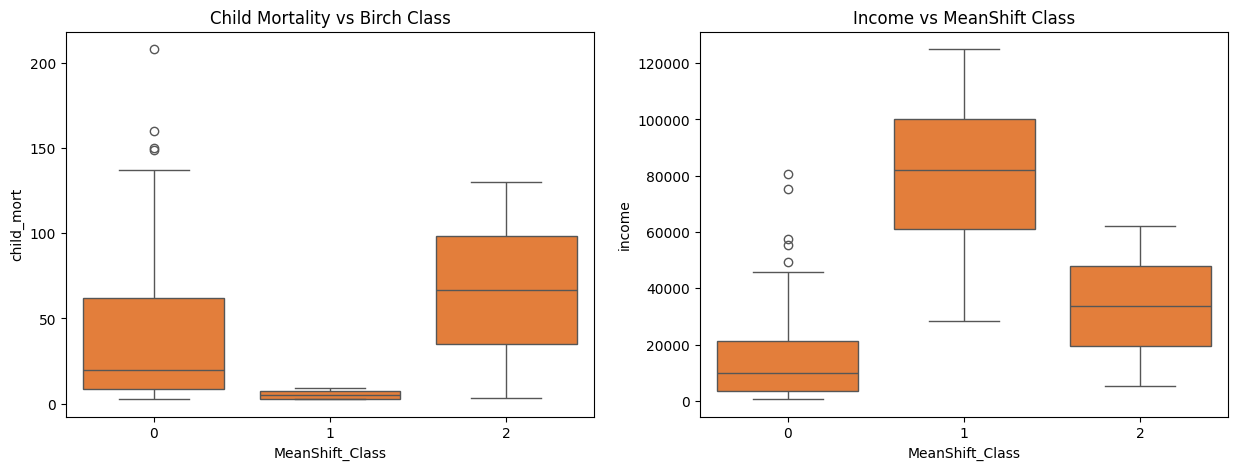

In [27]:
# Gráficos de boxplot para BIRCH
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='MeanShift_Class', y='child_mort', data=data_meanshift, color='#FF781F')
plt.title('Child Mortality vs Birch Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='MeanShift_Class', y='income', data=data_meanshift, color='#FF781F')
plt.title('Income vs MeanShift Class')

plt.show()

In [28]:
# Comparação dos Resultados
results = pd.DataFrame({
    'Algoritmo': ['KMeans', 'Agglomerative Clustering', 'MeanShift'],
    'Silhouette Score': [silhouette_kmeans, silhouette_agg, silhouette_mean_shift],
    'Davies-Bouldin Score': [davies_bouldin_kmeans, davies_bouldin_agg, davies_bouldin_mean_shift],
    'SSE': [sse_kmeans, sse_agg, sse_mean_shift]
})

print(results)

                  Algoritmo  Silhouette Score  Davies-Bouldin Score        SSE
0                    KMeans          0.451971              0.888280   6.451107
1  Agglomerative Clustering          0.377958              0.974972   6.949064
2                 MeanShift          0.540822              0.958307  13.058159


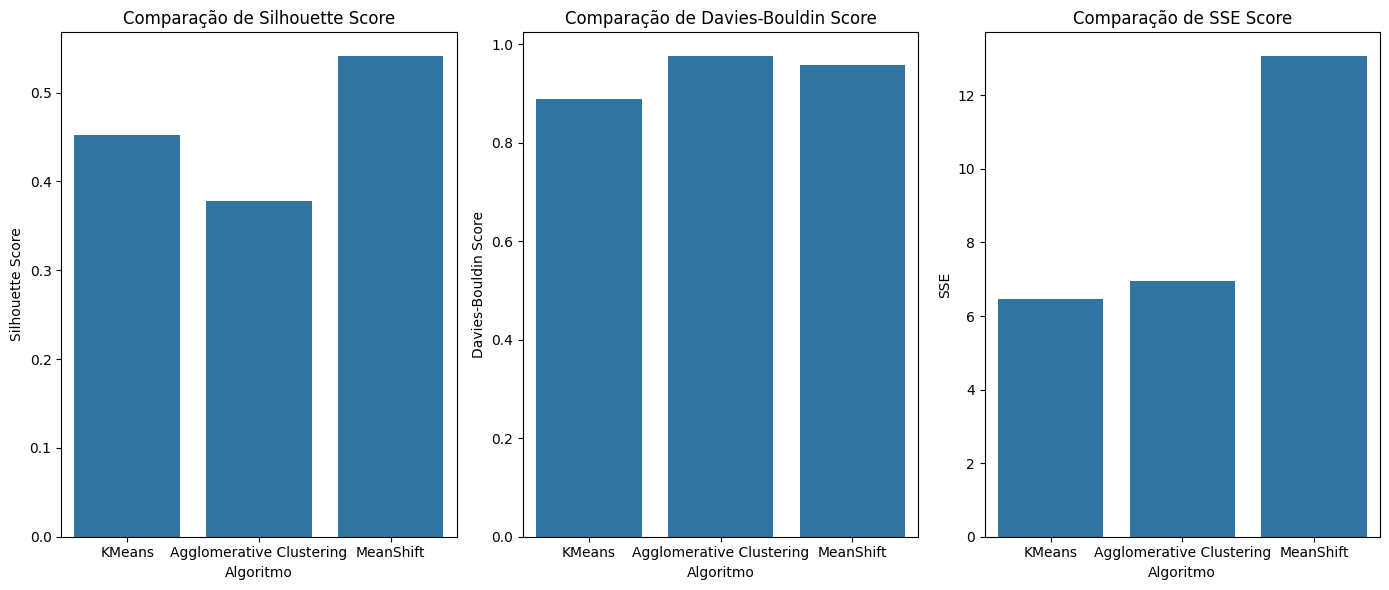

In [29]:
# Plotar as métricas de avaliação
fig, ax = plt.subplots(1, 3, figsize=(14, 6))

# Plotar Silhouette Score
sns.barplot(x='Algoritmo', y='Silhouette Score', data=results, ax=ax[0])
ax[0].set_title('Comparação de Silhouette Score')

# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='Davies-Bouldin Score', data=results, ax=ax[1])
ax[1].set_title('Comparação de Davies-Bouldin Score')
# Plotar Davies-Bouldin Score
sns.barplot(x='Algoritmo', y='SSE', data=results, ax=ax[2])
ax[2].set_title('Comparação de SSE Score')
plt.tight_layout()
plt.show()

In [30]:
# Determinar o melhor algoritmo com base nas métricas
best_silhouette = results.loc[results['Silhouette Score'].idxmax()]
best_davies_bouldin = results.loc[results['Davies-Bouldin Score'].idxmin()]
best_sse = results.loc[results['SSE'].idxmin()]
print(f"Melhor Algoritmo com base no Silhouette Score: {best_silhouette['Algoritmo']} com Silhouette Score de {best_silhouette['Silhouette Score']}")
print(f"Melhor Algoritmo com base no Davies-Bouldin Score: {best_davies_bouldin['Algoritmo']} com Davies-Bouldin Score de {best_davies_bouldin['Davies-Bouldin Score']}")
print(f"Melhor Algoritmo com base no SSE Score: {best_sse['Algoritmo']} com SSE Score de {best_sse['SSE']}")

Melhor Algoritmo com base no Silhouette Score: MeanShift com Silhouette Score de 0.5408223366558955
Melhor Algoritmo com base no Davies-Bouldin Score: KMeans com Davies-Bouldin Score de 0.8882803136476843
Melhor Algoritmo com base no SSE Score: KMeans com SSE Score de 6.451107371476114


Dos gráficos acima podemos concluir:

0.  Não é necessária ajuda
1.  Pode precisar de ajuda
2.  Ajuda necessária

Os 3 clusters ficam se misturando como podemos ver em 3 algoritmos diferentes, o que leva a concluir que os dados não estão permitindo que façamos uma boa clusterização, pois informaçoes de paises estão conflitando entre si, o que dificulta os agrupamentos. Vemos que em cada algoritmo o cluster fica em posiçoes diferentes, ou seja, o grupo que foi agrupado como cluster 1 no K-means, foi agrupado como cluster 2 no MeanShift.